In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle

### Creating the original population

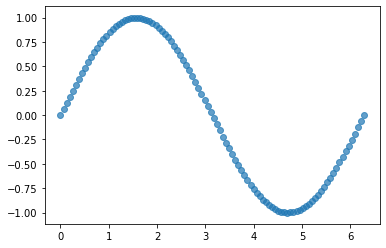

In [2]:
T = 100
x_axis = np.linspace(0, 2*np.pi , T)
y_axis = np.sin(x_axis)

# plotting x,y axis
plt.scatter(x_axis, y_axis, alpha=0.7)

### Take random subset for training

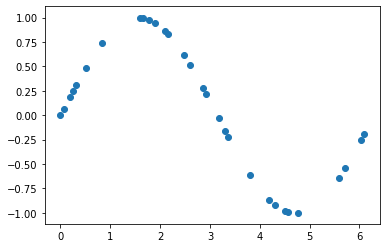

In [3]:
N= 30
idx = np.random.choice(T, size = N, replace=False)  # pick an 'N' random number between 0-'T'

# Create a training dataset with 'N' instances
X_train = x_axis[idx].reshape(N, 1)
y_train = y_axis[idx]

# plot the training set
plt.scatter(X_train, y_train)

### Train a Single Tree model

In [4]:
# Fit a tree model
model = DecisionTreeRegressor(random_state=12)
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=12, splitter='best')

score: 0.9876


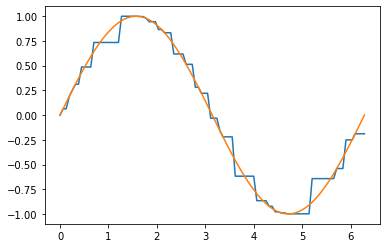

In [5]:
# predict for the full dataset
y_pred = model.predict(x_axis.reshape(T,1))

single_tree_score = np.round(model.score(x_axis.reshape(T,1), y_axis),4)
print(f'score: {single_tree_score}')

plt.plot(x_axis, y_pred)
plt.plot(x_axis, y_axis)
plt.show()

### Create and train Bagging-based model

In [6]:
# The Bagging code
class BaggedTreeRegressor:
  def __init__(self, B):
    self.B = B

  def fit(self, X, Y):
    N = len(X)
    self.models = []
    for b in range(self.B):
      idx = np.random.choice(N, size=N, replace=True)  # Picking 'N' samples from the training set(which is the full number with "replace=ON")
      Xb = X[idx]
      Yb = Y[idx]

      model = DecisionTreeRegressor(random_state=12)
      model.fit(Xb, Yb)
      self.models.append(model)

  def predict(self, X):
    predictions = np.zeros(len(X))
    for model in self.models:
      predictions += model.predict(X)
    return predictions / self.B

  def score(self, X, Y):
    d1 = Y - self.predict(X)
    d2 = Y - Y.mean()
    return 1 - d1.dot(d1) / d2.dot(d2)

score for bagged tree: 0.9895


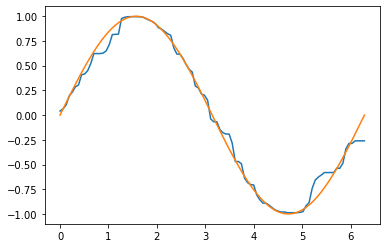

In [7]:
# Fit the ensemble model
model = BaggedTreeRegressor(200)
model.fit(X_train, y_train)
print("score for bagged tree:", np.round(model.score(x_axis.reshape(T, 1), y_axis),4))
prediction = model.predict(x_axis.reshape(T, 1))

# plot the bagged regressor's predictions
plt.plot(x_axis, prediction)
plt.plot(x_axis, y_axis)
plt.show()

### Compare the results
According to all my trials the Bagging model performs consistently better

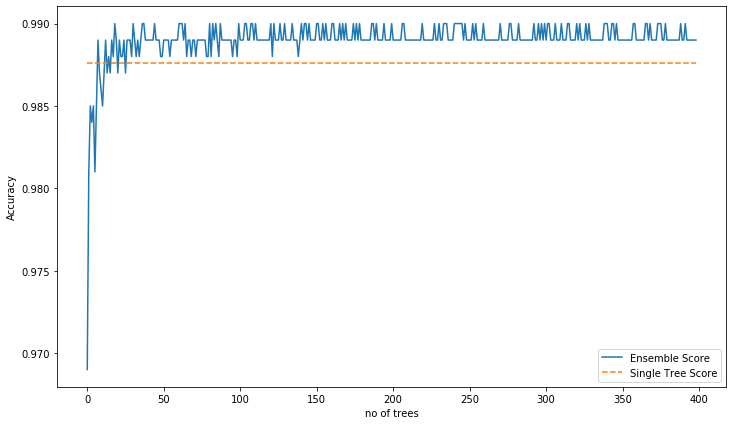

In [8]:
accu = []
for i in range(1, 400):
    model = BaggedTreeRegressor(i)
    model.fit(X_train, y_train)
    accu.append(np.round(model.score(x_axis.reshape(T, 1), y_axis),3))

# Plot a Ensemble performance with the increase of no of trees
plt.figure(figsize=(12,7))
plt.plot(accu, label='Ensemble Score')
plt.plot([single_tree_score for i in range(len(accu))], ls='--', label='Single Tree Score')
plt.xlabel('no of trees')
plt.ylabel('Accuracy')
plt.legend()
plt.show()    